### Importando biblioteca

In [1]:
#!pip install odfpy

In [2]:
import pandas as pd

### Lendo a base de dados

In [3]:
fuel = pd.read_excel('/content/vendas-combustiveis-m3.ods', sheet_name='DPCache_m3')

In [4]:
#fuel = pd.read_excel('/content/vendas-combustiveis-m3.ods', sheet_name='DPCache_m3_2')

In [5]:
fuel

,COMBUSTÍVEL,ANO,REGIÃO,ESTADO,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,TOTAL
0,GASOLINA C (m3),2000,REGIÃO NORTE,RONDÔNIA,136073.253000,9563.263000,11341.229000,9369.746000,10719.983000,11165.968000,12312.451000,11220.970000,12482.281000,13591.122000,11940.570000,11547.576000,10818.094000
1,GASOLINA C (m3),2000,REGIÃO NORTE,ACRE,3358.346000,40001.853000,3065.758000,3495.290000,2946.930000,3023.920000,3206.930000,3612.580000,3264.460000,3835.740000,3676.571000,3225.610000,3289.718000
2,GASOLINA C (m3),2000,REGIÃO NORTE,AMAZONAS,20766.918000,21180.919000,242742.352000,17615.604000,20258.200000,18741.344000,19604.023000,20221.674000,20792.616000,19912.898000,21869.338000,21145.643000,20633.175000
3,GASOLINA C (m3),2000,REGIÃO NORTE,RORAIMA,3716.032000,3200.400000,3339.332000,43338.929000,3259.300000,3636.216000,3631.569000,3348.416000,3394.016000,4078.616000,3346.616000,4029.900000,4358.516000
4,GASOLINA C (m3),2000,REGIÃO NORTE,PARÁ,29755.907000,28661.951000,28145.784000,29294.796000,359575.398000,28830.479000,32297.047000,27310.979000,29396.384000,26511.009000,36553.250000,31807.840000,31009.972000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,GLP (m3),2020,REGIÃO SUL,RIO GRANDE DO SUL,73247.920290,81469.222826,75607.009058,72818.829710,NaN,NaN,NaN,618788.938406,58679.211957,57649.414855,68522.800725,64045.161232,66749.367754
4532,GLP (m3),2020,REGIÃO CENTRO-OESTE,MATO GROSSO DO SUL,15190.643116,15877.811594,16876.476449,16036.112319,14687.788043,NaN,NaN,NaN,137899.302536,13774.106884,14137.695652,16281.139493,15037.528986
4533,GLP (m3),2020,REGIÃO CENTRO-OESTE,MATO GROSSO,19118.619565,18773.081522,19899.867754,20678.385870,18972.943841,18051.436594,NaN,NaN,NaN,173256.967391,18763.161232,18321.987319,20677.483696
4534,GLP (m3),2020,REGIÃO CENTRO-OESTE,GOIÁS,53302.086957,48894.621377,47184.788043,49687.793478,52665.449275,50069.005435,48032.530797,NaN,NaN,NaN,443268.739130,46850.585145,46581.878623


Analisando os tipos dos dados existentes no arquivo

In [6]:
fuel.dtypes

COMBUSTÍVEL     object
ANO              int64
REGIÃO          object
ESTADO          object
Jan            float64
Fev            float64
Mar            float64
Abr            float64
Mai            float64
Jun            float64
Jul            float64
Ago            float64
Set            float64
Out            float64
Nov            float64
Dez            float64
TOTAL          float64
dtype: object

### Renomeando as colunas

In [7]:
fuel.rename(columns = {'COMBUSTÍVEL':'COMBUSTIVEL', 'REGIÃO':'REGIAO', 'Jan':'1', 'Fev':'2', 
                     'Mar':'3', 'Abr':'4', 'Mai':'5', 'Jun':'6',  'Jul':'7', 'Ago':'8', 
                     'Set':'9', 'Out':'10', 'Nov':'11', 'Dez':'12'}, inplace = True)

### Alterando o formato do dataframe

In [8]:
fuel = pd.melt(fuel, id_vars=['COMBUSTIVEL', 'ANO', 'REGIAO', 'ESTADO'], 
                 var_name = 'MES', value_name = 'melt_total')

In [9]:
fuel

,COMBUSTIVEL,ANO,REGIAO,ESTADO,MES,melt_total
0,GASOLINA C (m3),2000,REGIÃO NORTE,RONDÔNIA,1,136073.253000
1,GASOLINA C (m3),2000,REGIÃO NORTE,ACRE,1,3358.346000
2,GASOLINA C (m3),2000,REGIÃO NORTE,AMAZONAS,1,20766.918000
3,GASOLINA C (m3),2000,REGIÃO NORTE,RORAIMA,1,3716.032000
4,GASOLINA C (m3),2000,REGIÃO NORTE,PARÁ,1,29755.907000
...,...,...,...,...,...,...
58963,GLP (m3),2020,REGIÃO SUL,RIO GRANDE DO SUL,TOTAL,66749.367754
58964,GLP (m3),2020,REGIÃO CENTRO-OESTE,MATO GROSSO DO SUL,TOTAL,15037.528986
58965,GLP (m3),2020,REGIÃO CENTRO-OESTE,MATO GROSSO,TOTAL,20677.483696
58966,GLP (m3),2020,REGIÃO CENTRO-OESTE,GOIÁS,TOTAL,46581.878623


### Preprocessando os dados

Removendo 'TOTAL' da coluna 'MES' 

In [10]:
fuel.drop(fuel.index[fuel['MES'] == 'TOTAL'], inplace = True)

Concatenando ano e mes para poder criar a data

In [11]:
fuel['DATA'] = fuel['ANO'].astype(str) + '-' + fuel['MES']

In [12]:
fuel.dtypes

COMBUSTIVEL     object
ANO              int64
REGIAO          object
ESTADO          object
MES             object
melt_total     float64
DATA            object
dtype: object

In [13]:
fuel['DATA'] = pd.to_datetime(fuel['DATA'])

In [14]:
fuel.dtypes

COMBUSTIVEL            object
ANO                     int64
REGIAO                 object
ESTADO                 object
MES                    object
melt_total            float64
DATA           datetime64[ns]
dtype: object

Removendo colunas que não serão mais utilizadas

In [15]:
fuel = fuel.drop(labels=['REGIAO', 'ANO','MES'], axis=1)

Formatando as colunas 'COMBUSTIVEL' e 'ESTADO'

In [16]:
fuel['COMBUSTIVEL'] = fuel['COMBUSTIVEL'].str.replace('(m3)',"",regex = False).str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [17]:
fuel['ESTADO'] = fuel['ESTADO'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Renomeando as colunas para o padrão

In [18]:
fuel.rename(columns = {'COMBUSTIVEL':'product', 'ESTADO':'uf', 'melt_total':'volume', 'DATA': 'year_month'}, inplace = True)

Criando a coluna 'unit'

In [19]:
fuel['unit'] = 'm3'

### Checando os valores nulos das colunas

In [20]:
fuel.isnull().values.any()

True

In [21]:
fuel.isnull().sum()

product         0
uf              0
volume        598
year_month      0
unit            0
dtype: int64

Fuel: volume 598

Diesel: volume 374

In [22]:
fuel['volume'] = fuel['volume'].fillna(0)

In [23]:
fuel.isnull().sum()

product       0
uf            0
volume        0
year_month    0
unit          0
dtype: int64

### Reordenando colunas

In [24]:
fuel = fuel[['year_month','uf','product','unit','volume']]

In [25]:
fuel

,year_month,uf,product,unit,volume
0,2000-01-01,RONDONIA,GASOLINA C,m3,136073.253000
1,2000-01-01,ACRE,GASOLINA C,m3,3358.346000
2,2000-01-01,AMAZONAS,GASOLINA C,m3,20766.918000
3,2000-01-01,RORAIMA,GASOLINA C,m3,3716.032000
4,2000-01-01,PARA,GASOLINA C,m3,29755.907000
...,...,...,...,...,...
54427,2020-12-01,RIO GRANDE DO SUL,GLP,m3,64045.161232
54428,2020-12-01,MATO GROSSO DO SUL,GLP,m3,16281.139493
54429,2020-12-01,MATO GROSSO,GLP,m3,18321.987319
54430,2020-12-01,GOIAS,GLP,m3,46850.585145


### Checando se o resultado na coluna "volume" bate com os valores nas tabelas dinâmicas

In [26]:
totalSum = fuel.groupby([pd.to_datetime(fuel['year_month']).dt.year, 
                         pd.to_datetime(fuel['year_month']).dt.month, 
                         'product']).agg({'volume': sum}).round(3)

In [27]:
totalSum

volume
year_month year_month product                          
2000       1          ETANOL HIDRATADO       450152.863
                      GASOLINA C            2664999.835
                      GASOLINA DE AVIACAO      7137.909
                      GLP                   2230953.696
                      OLEO COMBUSTIVEL      1404970.006
...                                                 ...
2020       12         GLP                   1234468.286
                      OLEO COMBUSTIVEL       146470.686
                      OLEO DIESEL           6579181.414
                      QUEROSENE DE AVIACAO  1396591.332
                      QUEROSENE ILUMINANTE      158.000

[2016 rows x 1 columns]

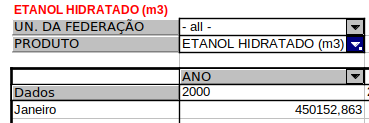

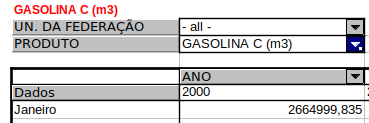

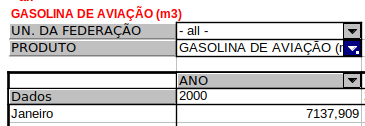

### Verificando o tamanho máximo de caracteres das colunas

In [28]:
import numpy as np
measurer = np.vectorize(len)
size = dict(zip(fuel, measurer(fuel.values.astype(str)).max(axis=0)))
size

{'product': 20, 'uf': 19, 'unit': 2, 'volume': 20, 'year_month': 19}

Fuel = {'product': 21, 'uf': 19, 'unit': 2, 'volume': 20, 'year_month': 19}

Diesel = {'product': 22, 'uf': 19, 'unit': 2, 'volume': 18, 'year_month': 19}